In [1]:
import sys
from collections import OrderedDict
import pandas as pd
import numpy as np
# Load libraries
import pandas
import pandas as pd
#from pandas.plotting import scatter_matrix <-- deprecated
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

fname = 'BigData\\BigData.xlsx'
dataset = pandas.read_excel(fname)
# preprocessing
dataset = dataset.replace('.', np.nan)
dataset.iloc[:, 6:] = dataset.iloc[:, 6:].apply(lambda row: row.astype(float))

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.contrib import ScatterVisualizer
from yellowbrick.regressor import PredictionError

In [7]:
# Applying Regression Model on original data
columnsListB = dataset.columns.values.tolist()
depVar = dataset['Disease Incidence'].values

# Three cases for independent vars: TAV, Rain fall, RH
st1 = columnsListB.index('pcpn_JunW1')
ed1 = columnsListB.index('pcpn_SeptW4')
st2 = columnsListB.index('TAV_JunW1')
ed2 = columnsListB.index('TAV_SeptW4')
st3 = columnsListB.index('RAV_JunW1')
ed3 = columnsListB.index('RAV_SeptW4')
indepVarRain = dataset.iloc[:, st1:ed1+1]
indepVarTAV = dataset.iloc[:, st2:ed2+1]
indepVarRAV = dataset.iloc[:, st3:ed3+1]

In [8]:

### Using Rainfall as dependent vars: The following regressors have a positive coefs ######


In [15]:
regListRain = ['pcpn_JunW2', 'pcpn_JunW4', 'pcpn_JulW1', 'pcpn_JulW2', 'pcpn_JulW3', 'pcpn_AugW2', 'pcpn_SeptW1']
X = dataset[regListRain]
# X = indepVarRain
y = dataset['Disease Incidence'].values

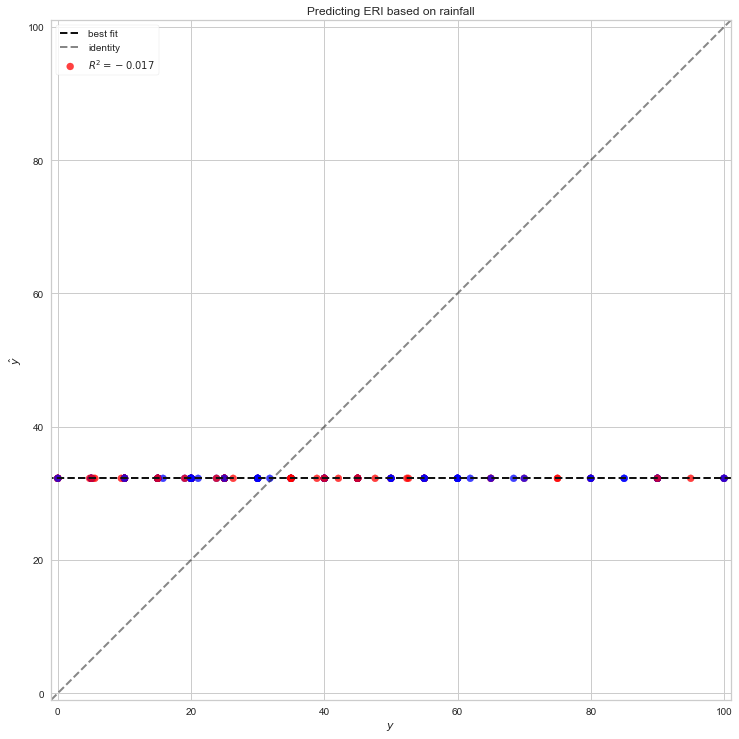

In [18]:

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model,
                point_color=["red", "blue"], title='Predicting ERI based on rainfall'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [14]:
## Coefs for Rain -- lasso
coefRain = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(visualizer.coef_))], axis = 1)
# coefRain

In [19]:
### Using TAV as dependent vars: The following regressors have a positive coefs ######

In [20]:
regListTav = ['TAV_JunW2', 'TAV_JunW3', 'TAV_AugW1', 'TAV_AugW3', 'TAV_AugW4', 'TAV_SeptW1', 'TAV_SeptW4']
X = dataset[regListTav]
y = dataset['Disease Incidence'].values

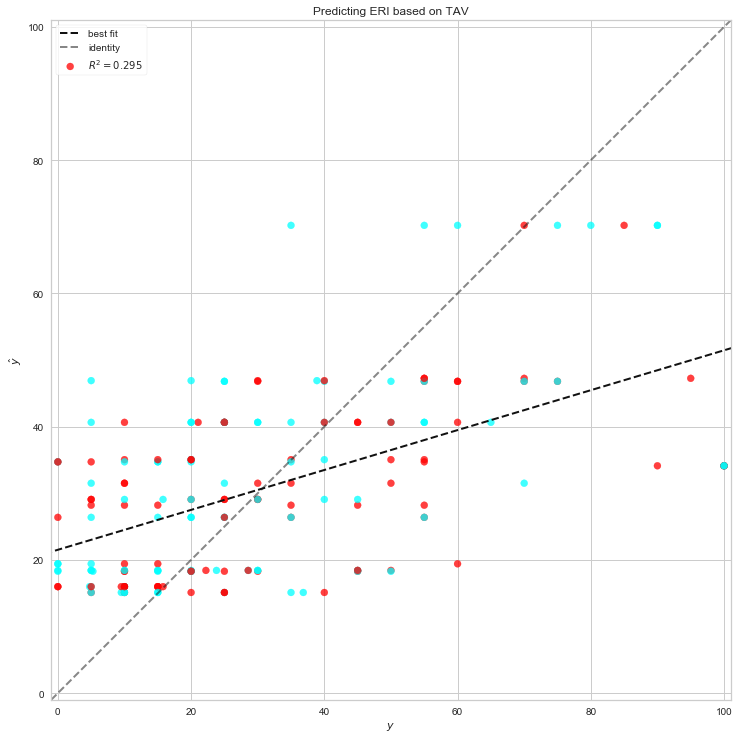

In [21]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = Lasso()

visualizer = PredictionError(
                model, point_color=["red", "cyan"], title='Predicting ERI based on TAV'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show()


In [22]:

### Using RAV as dependent vars: The following regressors have a positive coefs ######

In [23]:
regListRav = ['RAV_JunW1', 'RAV_JunW4', 'RAV_JulW2', 'RAV_JulW4', 'RAV_SeptW1', 'RAV_SeptW4', ]
X = dataset[regListTav]
y = dataset['Disease Incidence'].values

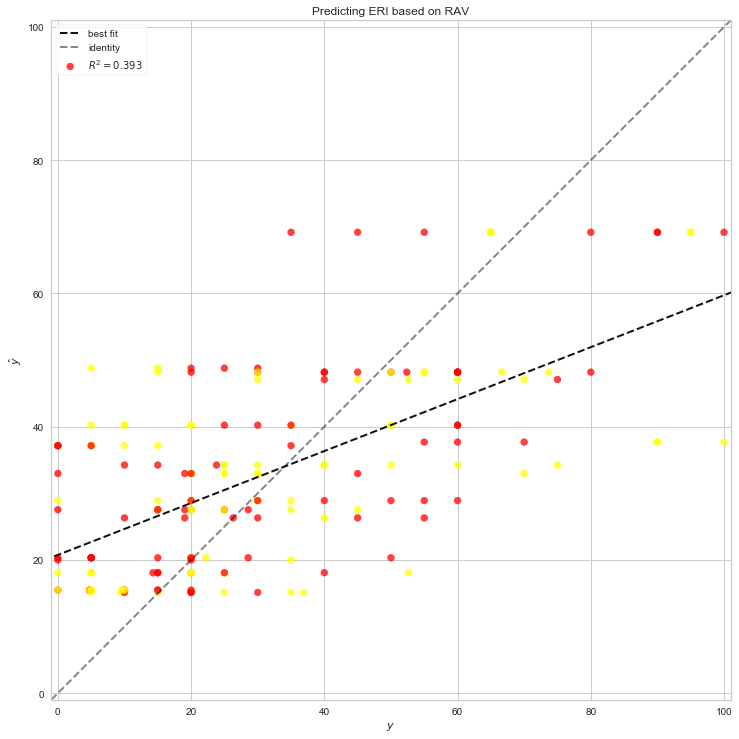

In [24]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = Lasso()

visualizer = PredictionError(
                model, point_color=["red", "yellow"], title='Predicting ERI based on RAV'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show()

In [27]:
###### Case where all the dept vars are maerged:


In [28]:
regLists = regListRain + regListRav + regListTav
X = dataset[regListTav]
y = dataset['Disease Incidence'].values

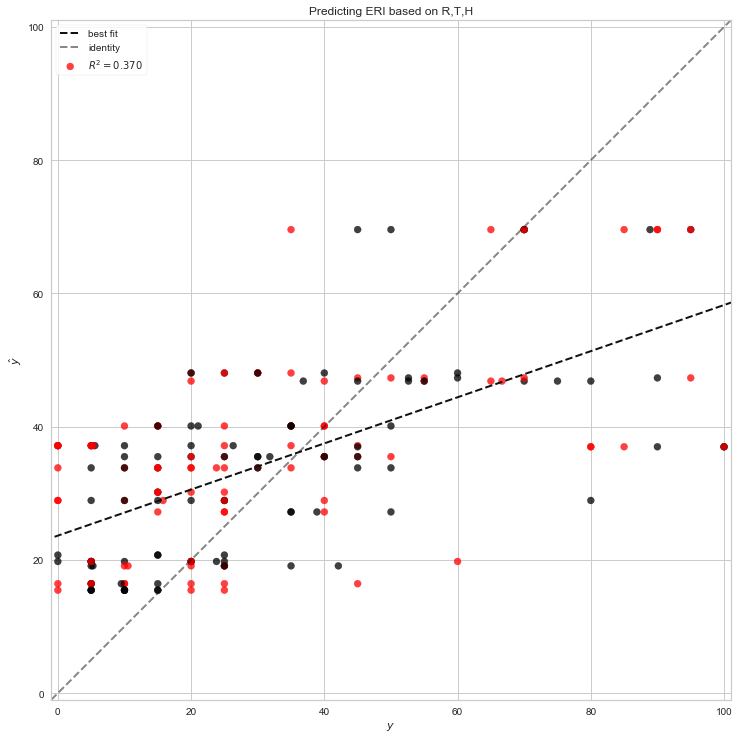

In [31]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = Lasso()

visualizer = PredictionError(
                model, point_color=["red", "black"], title='Predicting ERI based on R,T,H'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show()